# Transformacja Boxa-Coxa

In [15]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats

Jeśli dane znacznie różnią się od rozkładu normalnego, czasami można dokonać transformacji danych tak, by przypominały rozkład normalny. 

Na przykład dane często zawierają wartości, które zawsze są dodatnie (np.wzrost osób) i które mają długie ogony. 
W takich przypadkach możemy przetransformować dane stosując logarytm. 

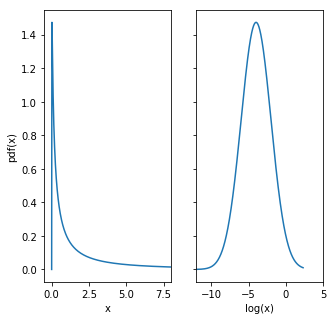

In [16]:
# Generate the data
x = np.logspace(-9,1,1001)+1e-9
lnd = stats.lognorm(2)
y = lnd.pdf(x)
# Generate 2 plots, side-by-side
fig, axs = plt.subplots(1,2, sharey=True)
# Left plot: linear scale on x-axis
axs[0].plot(x,y)
axs[0].set_xlim(-0.5,8)
axs[0].set_xlabel('x')
axs[0].set_ylabel('pdf(x)')

# Right plot: logarithmic scale on x-axis
axs[1].plot(np.log(x), y)
axs[1].set_xlim(-12,5)
axs[1].set_xlabel('log(x)')
plt.show()

Często normalność danych można poprawić przez zastosowanie odpowiedniej transformacji. Ogólną rodzinę transformacji, które często prowadzą do normalizacji danych można zapisać tak (http://www.jstor.org/stable/2984418?seq=1#page_scan_tab_contents):

$$
y^{(\lambda)}=\left\{\begin{matrix} \frac{y^\lambda-1} {\lambda} & \mbox{dla }\lambda \ne 0 \\ \ln(y) & \mbox{dla }\lambda = 0\end{matrix}\right.
$$

W module scipy.stats mamy tę transformację zaimplementowaną jako <tt> boxcox()</tt>.

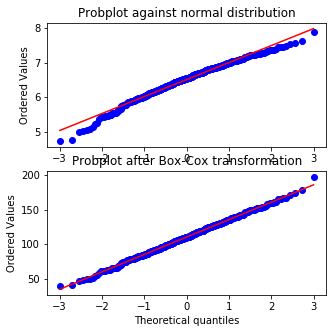

In [17]:

fig = plt.figure()
ax1 = fig.add_subplot(211)
x = stats.loggamma.rvs(5, size=500) + 5
prob = stats.probplot(x, dist=stats.norm, plot=ax1)
ax1.set_xlabel('')
ax1.set_title('Probplot against normal distribution')

ax2 = fig.add_subplot(212)
xt, _ = stats.boxcox(x)
prob = stats.probplot(xt, dist=stats.norm, plot=ax2)
ax2.set_title('Probplot after Box-Cox transformation')

plt.show()

# Zadanie
Pobierz dane z pliku https://github.com/przem85/statistics/blob/master/D7/ex_ad_2.txt oraz:
<ul>
<li> Narysuj histogram </li>
<li> Sprawdź metodami graficznymi i za pomocą wybranego testu czy dane pochodzą z rozkładu normalnego </li>
<li> Wykonaj trasformatę Boxa-Coxa </li>
<li> Sprawdź metodami graficznymi i za pomocą wybranego testu czy dane po transformacji pochodzą z rozkładu normalnego </li>
</ul>

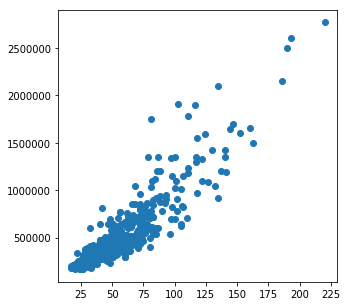

In [23]:
dane = np.loadtxt("ex_ad_2.txt")
# print(dane)
# Badamy przyspieszenia
w = dane[:,1]
# print(w)
plt.scatter(dane[:,0], dane[:,1])
plt.show()

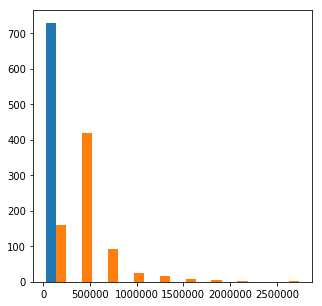

In [19]:
plt.hist(dane)
plt.show()

/home/kodolamacz/anaconda3/lib/python3.7/site-packages/scipy/stats/morestats.py:900: RuntimeWarning: divide by zero encountered in log
  llf -= N / 2.0 * np.log(np.sum((y - y_mean)**2. / N, axis=0))
/home/kodolamacz/anaconda3/lib/python3.7/site-packages/scipy/optimize/optimize.py:2308: RuntimeWarning: invalid value encountered in double_scalars
  w = xb - ((xb - xc) * tmp2 - (xb - xa) * tmp1) / denom
/home/kodolamacz/anaconda3/lib/python3.7/site-packages/scipy/optimize/optimize.py:1926: RuntimeWarning: invalid value encountered in double_scalars
  tmp1 = (x - w) * (fx - fv)
/home/kodolamacz/anaconda3/lib/python3.7/site-packages/scipy/optimize/optimize.py:1927: RuntimeWarning: invalid value encountered in double_scalars
  tmp2 = (x - v) * (fx - fw)
/home/kodolamacz/anaconda3/lib/python3.7/site-packages/scipy/optimize/optimize.py:1928: RuntimeWarning: invalid value encountered in double_scalars
  p = (x - v) * tmp2 - (x - w) * tmp1
/home/kodolamacz/anaconda3/lib/python3.7/site-packages/s

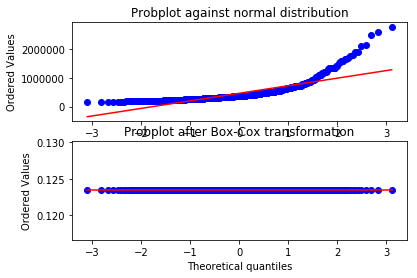

In [12]:
fig = plt.figure()
ax1 = fig.add_subplot(211)
# x = stats.loggamma.rvs(5, size=500) + 5
prob = stats.probplot(w, dist=stats.norm, plot=ax1)
ax1.set_xlabel('')
ax1.set_title('Probplot against normal distribution')

ax2 = fig.add_subplot(212)
xt, _ = stats.boxcox(w)
prob = stats.probplot(xt, dist=stats.norm, plot=ax2)
ax2.set_title('Probplot after Box-Cox transformation')

plt.show()
# drugi wykres jest zly bo "wpadlismy w pułapke"

In [36]:
# żeby nie wpasc w pułapke to trzba podać własną lambde
xt = stats.boxcox(w, lmbda=-0.4)

/home/kodolamacz/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


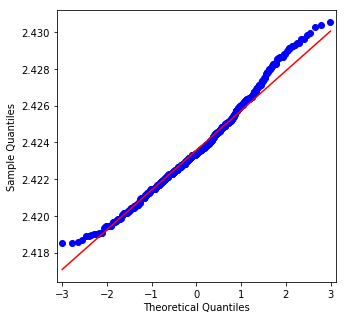

In [35]:
import statsmodels.api as sm
plt.rc('figure', figsize=(5,5))
sm.qqplot(xt, stats.norm, line='q')
plt.show()

In [38]:
# jak sprawdzić która lambda jest najlepsza? badamy wartość stats.normaltest (najlepsza wartość lambdy = -0.61)
stats.normaltest(xt)

NormaltestResult(statistic=19.22659020472336, pvalue=6.683423542394727e-05)